In [1]:
import wordcloud as wc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import re

In [2]:
TRUMP = "Trump2017.txt"
OBAMA = "Obama2013.txt"
BUSH = "Bush2001.txt"
REAGAN = "Reagan1981.txt"
KENNEDY = "Kennedy1961.txt"
ROOSEVELT = "Roosevelt1941.txt"
P_NAMES = ["Trump - 2017", "Obama - 2013", "Bush - 2001", "Reagan - 1981", "Kennedy - 1961", "Roosevelt - 1941"]
PARTIES = {"Trump - 2017": "republican", "Obama - 2013": "democrat", "Bush - 2001": "republican", "Reagan - 1981": "republican",
           "Kennedy - 1961": "democrat", "Roosevelt - 1941": "democrat"}

# stopwords from https://gist.github.com/sebleier/554280
STOPWORDS = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
             "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
             "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
             "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
             "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
             "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
             "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
             "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor",
             "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# speeches from https://www.presidency.ucsb.edu/documents/app-categories/spoken-addresses-and-remarks/presidential/inaugural-addresses
URLS = ["https://www.presidency.ucsb.edu/documents/inaugural-address-14", 
        "https://www.presidency.ucsb.edu/documents/inaugural-address-15", 
        "https://www.presidency.ucsb.edu/documents/inaugural-address-52",
        "https://www.presidency.ucsb.edu/documents/inaugural-address-11",
        "https://www.presidency.ucsb.edu/documents/inaugural-address-2", 
        "https://www.presidency.ucsb.edu/documents/third-inaugural-address"]

In [3]:
def readtext(filename):
    '''
    Read a text file into a string
    filename - the name of the file
    return - a string
    '''
    with open(filename, 'r', encoding="utf-8") as infile:
        return infile.read()

In [4]:
trump = readtext(TRUMP)
obama = readtext(OBAMA)
bush = readtext(BUSH)
reagan = readtext(REAGAN)
kennedy = readtext(KENNEDY)
roosevelt = readtext(ROOSEVELT)
presidents = [trump, obama, bush, reagan, kennedy, roosevelt]

In [5]:
def remove_stopwords(text, stopwords):
    '''
    remove stop words from given text and given list of stop words
    text - given text
    stopwords - list of stopwords
    return - list with cleaned up words
    '''
    # only match groups with alphanumerics or apostrophes
    words = re.findall(r"[\w']+", text)
    for word in words:
        if word in stopwords:
            words.remove(word)
    return " ".join(words)

# remove stopwords from all speeches
for i in range(len(presidents)):
    presidents[i] = remove_stopwords(presidents[i], STOPWORDS)

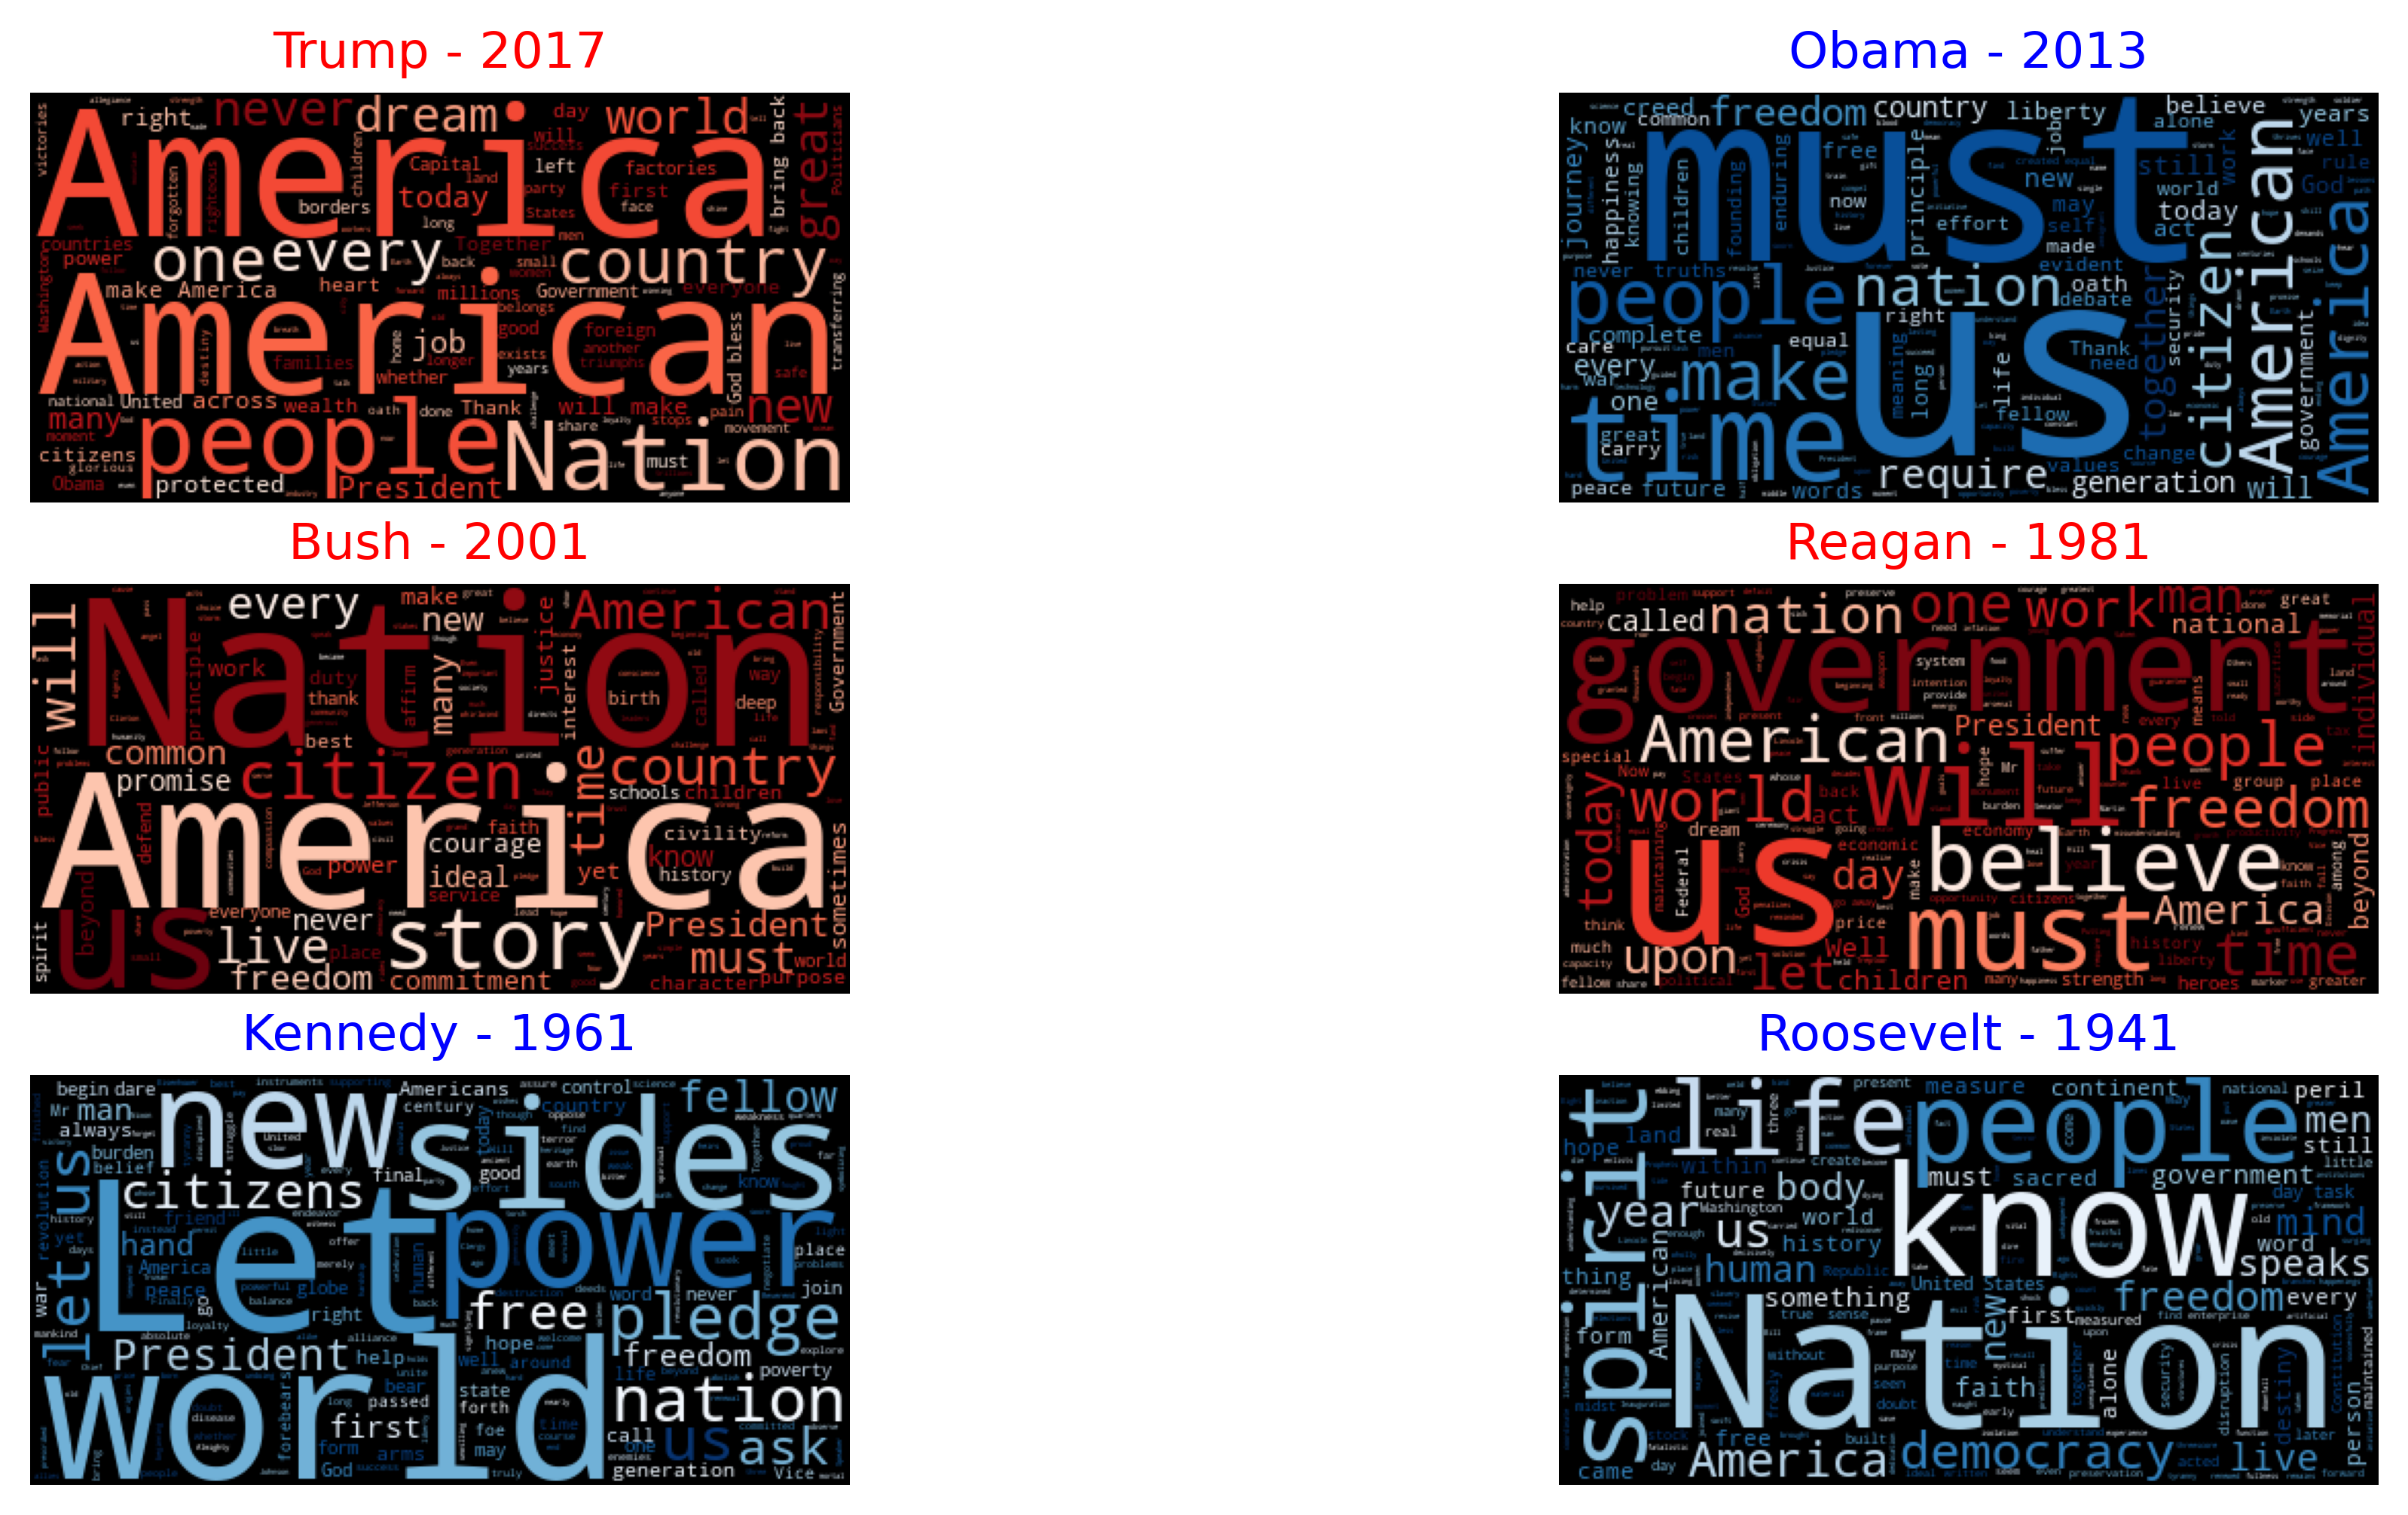

In [6]:
# Create cloud engines for republicans and democrats
cloud1 = wc.WordCloud(colormap = 'Reds',
        background_color = 'black')
cloud2 = wc.WordCloud(colormap = 'Blues',
        background_color = 'black')

# generate cloud image from each speech
rows = 3
cols = 2
fig = plt.figure(figsize=(12, 6), dpi=400)
for i in range(len(presidents)):
    if PARTIES[P_NAMES[i]] == "republican":
        p_cloud = cloud1.generate(presidents[i])
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(p_cloud)
        plt.title(P_NAMES[i], color="red")
        plt.axis('off')
    else:
        p_cloud = cloud2.generate(presidents[i])
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(p_cloud)
        plt.title(P_NAMES[i], color="blue")
        plt.axis('off')

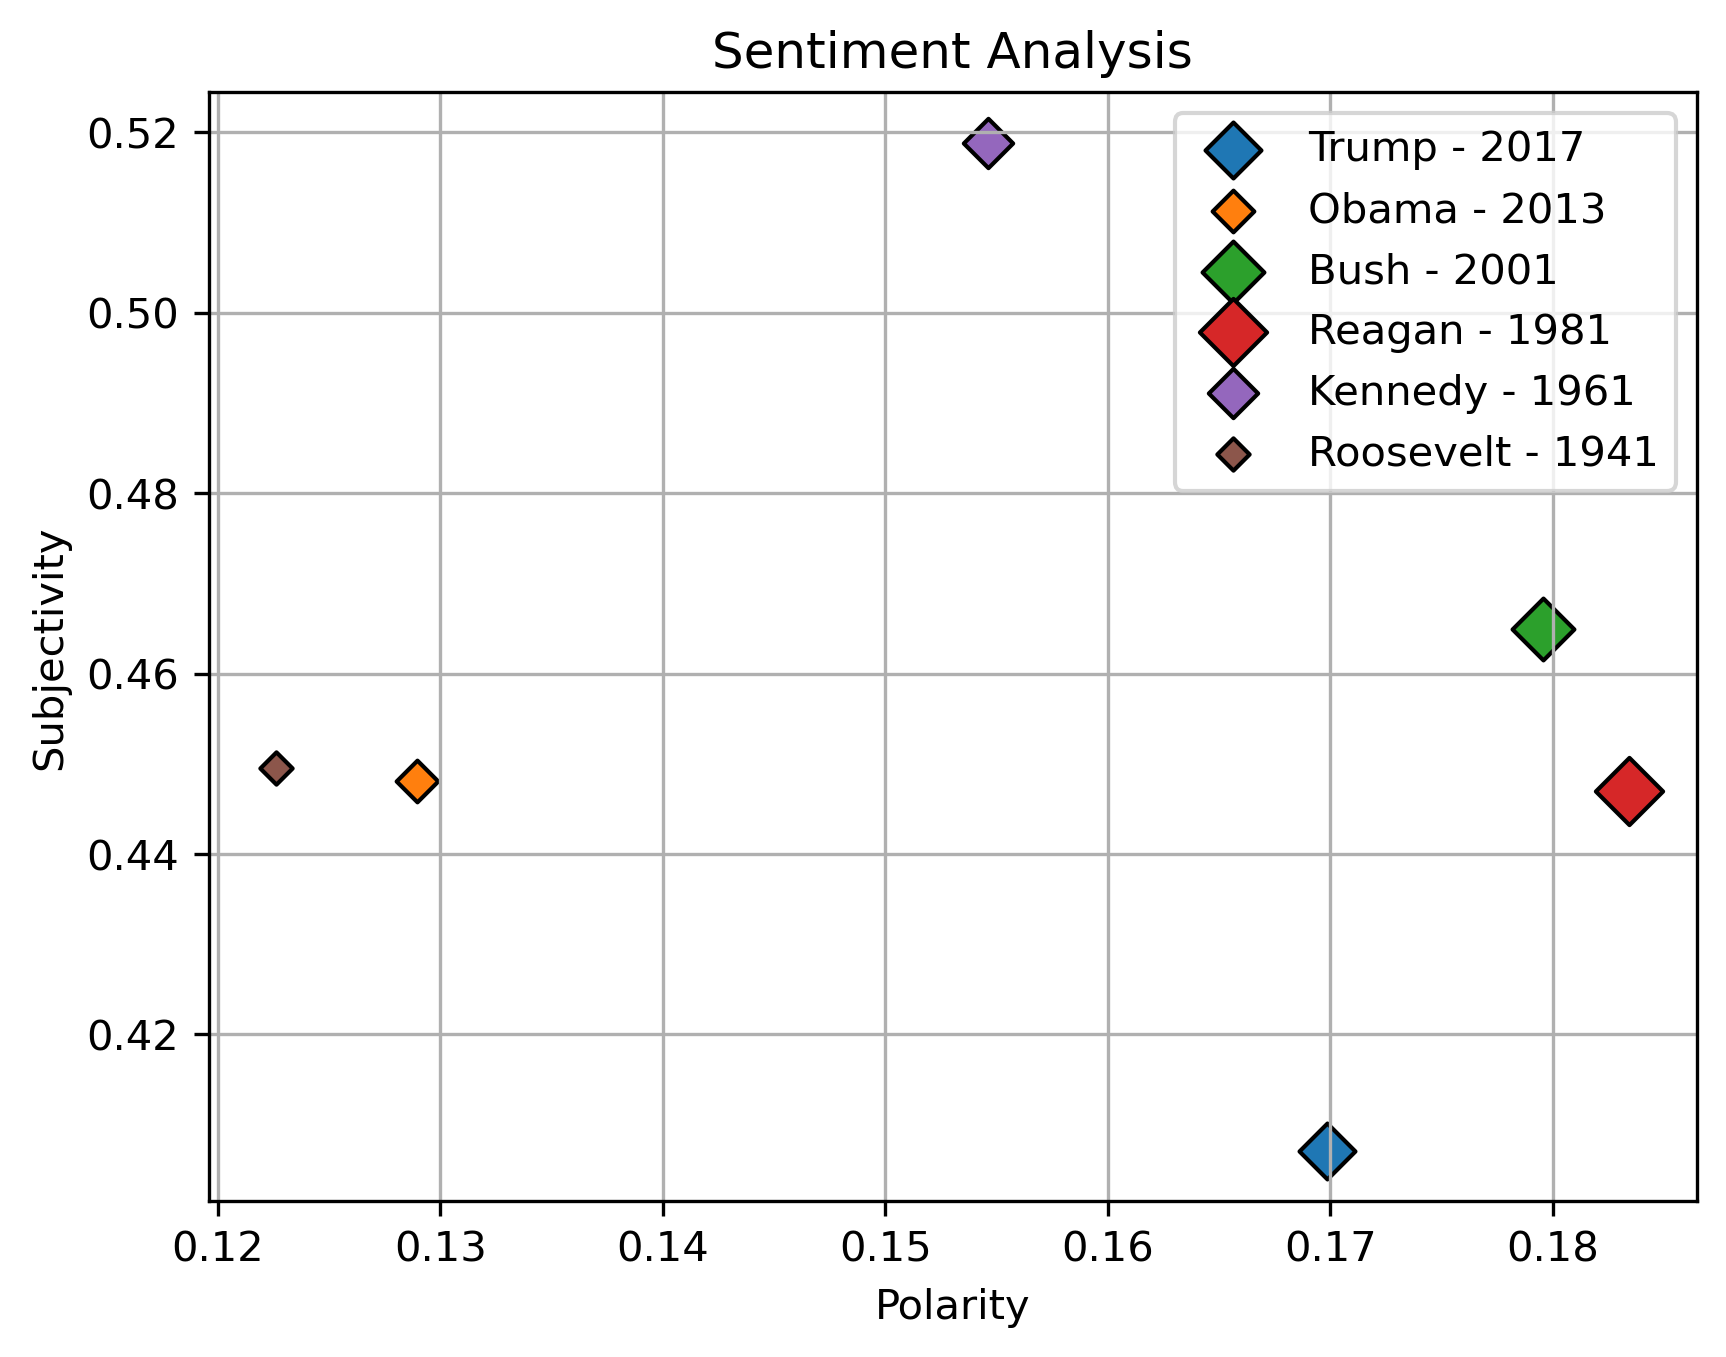

In [7]:
#  Polarity score vs. Subjectivity score plot (no hyperlinks)
fig = plt.figure(dpi=300)
area = {0: 90, 1: 50, 2: 110, 3: 130, 4: 70, 5: 30}
for i in range(len(presidents)):
    blob = TextBlob(presidents[i])
    s = plt.scatter(blob.sentiment.polarity, blob.sentiment.subjectivity, label=P_NAMES[i],
                marker="D", edgecolors="black", s=area[i])
plt.grid()
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend()

In [8]:
# The above plot reveals that out of all the speeches, Kennedy gave the most subjective one of them, and 
# Trump gave the least subjective among them. The aforementioned speeches are also outliers when 
# it comes to their subjectivity score since the remaining speeches have scores that fall in the 0.44-0.47 
# range. We can also see that Reagan's speech overall had the most positive 
# tone as opposed to Roosevelt's with a minimum polarity score of about 0.122

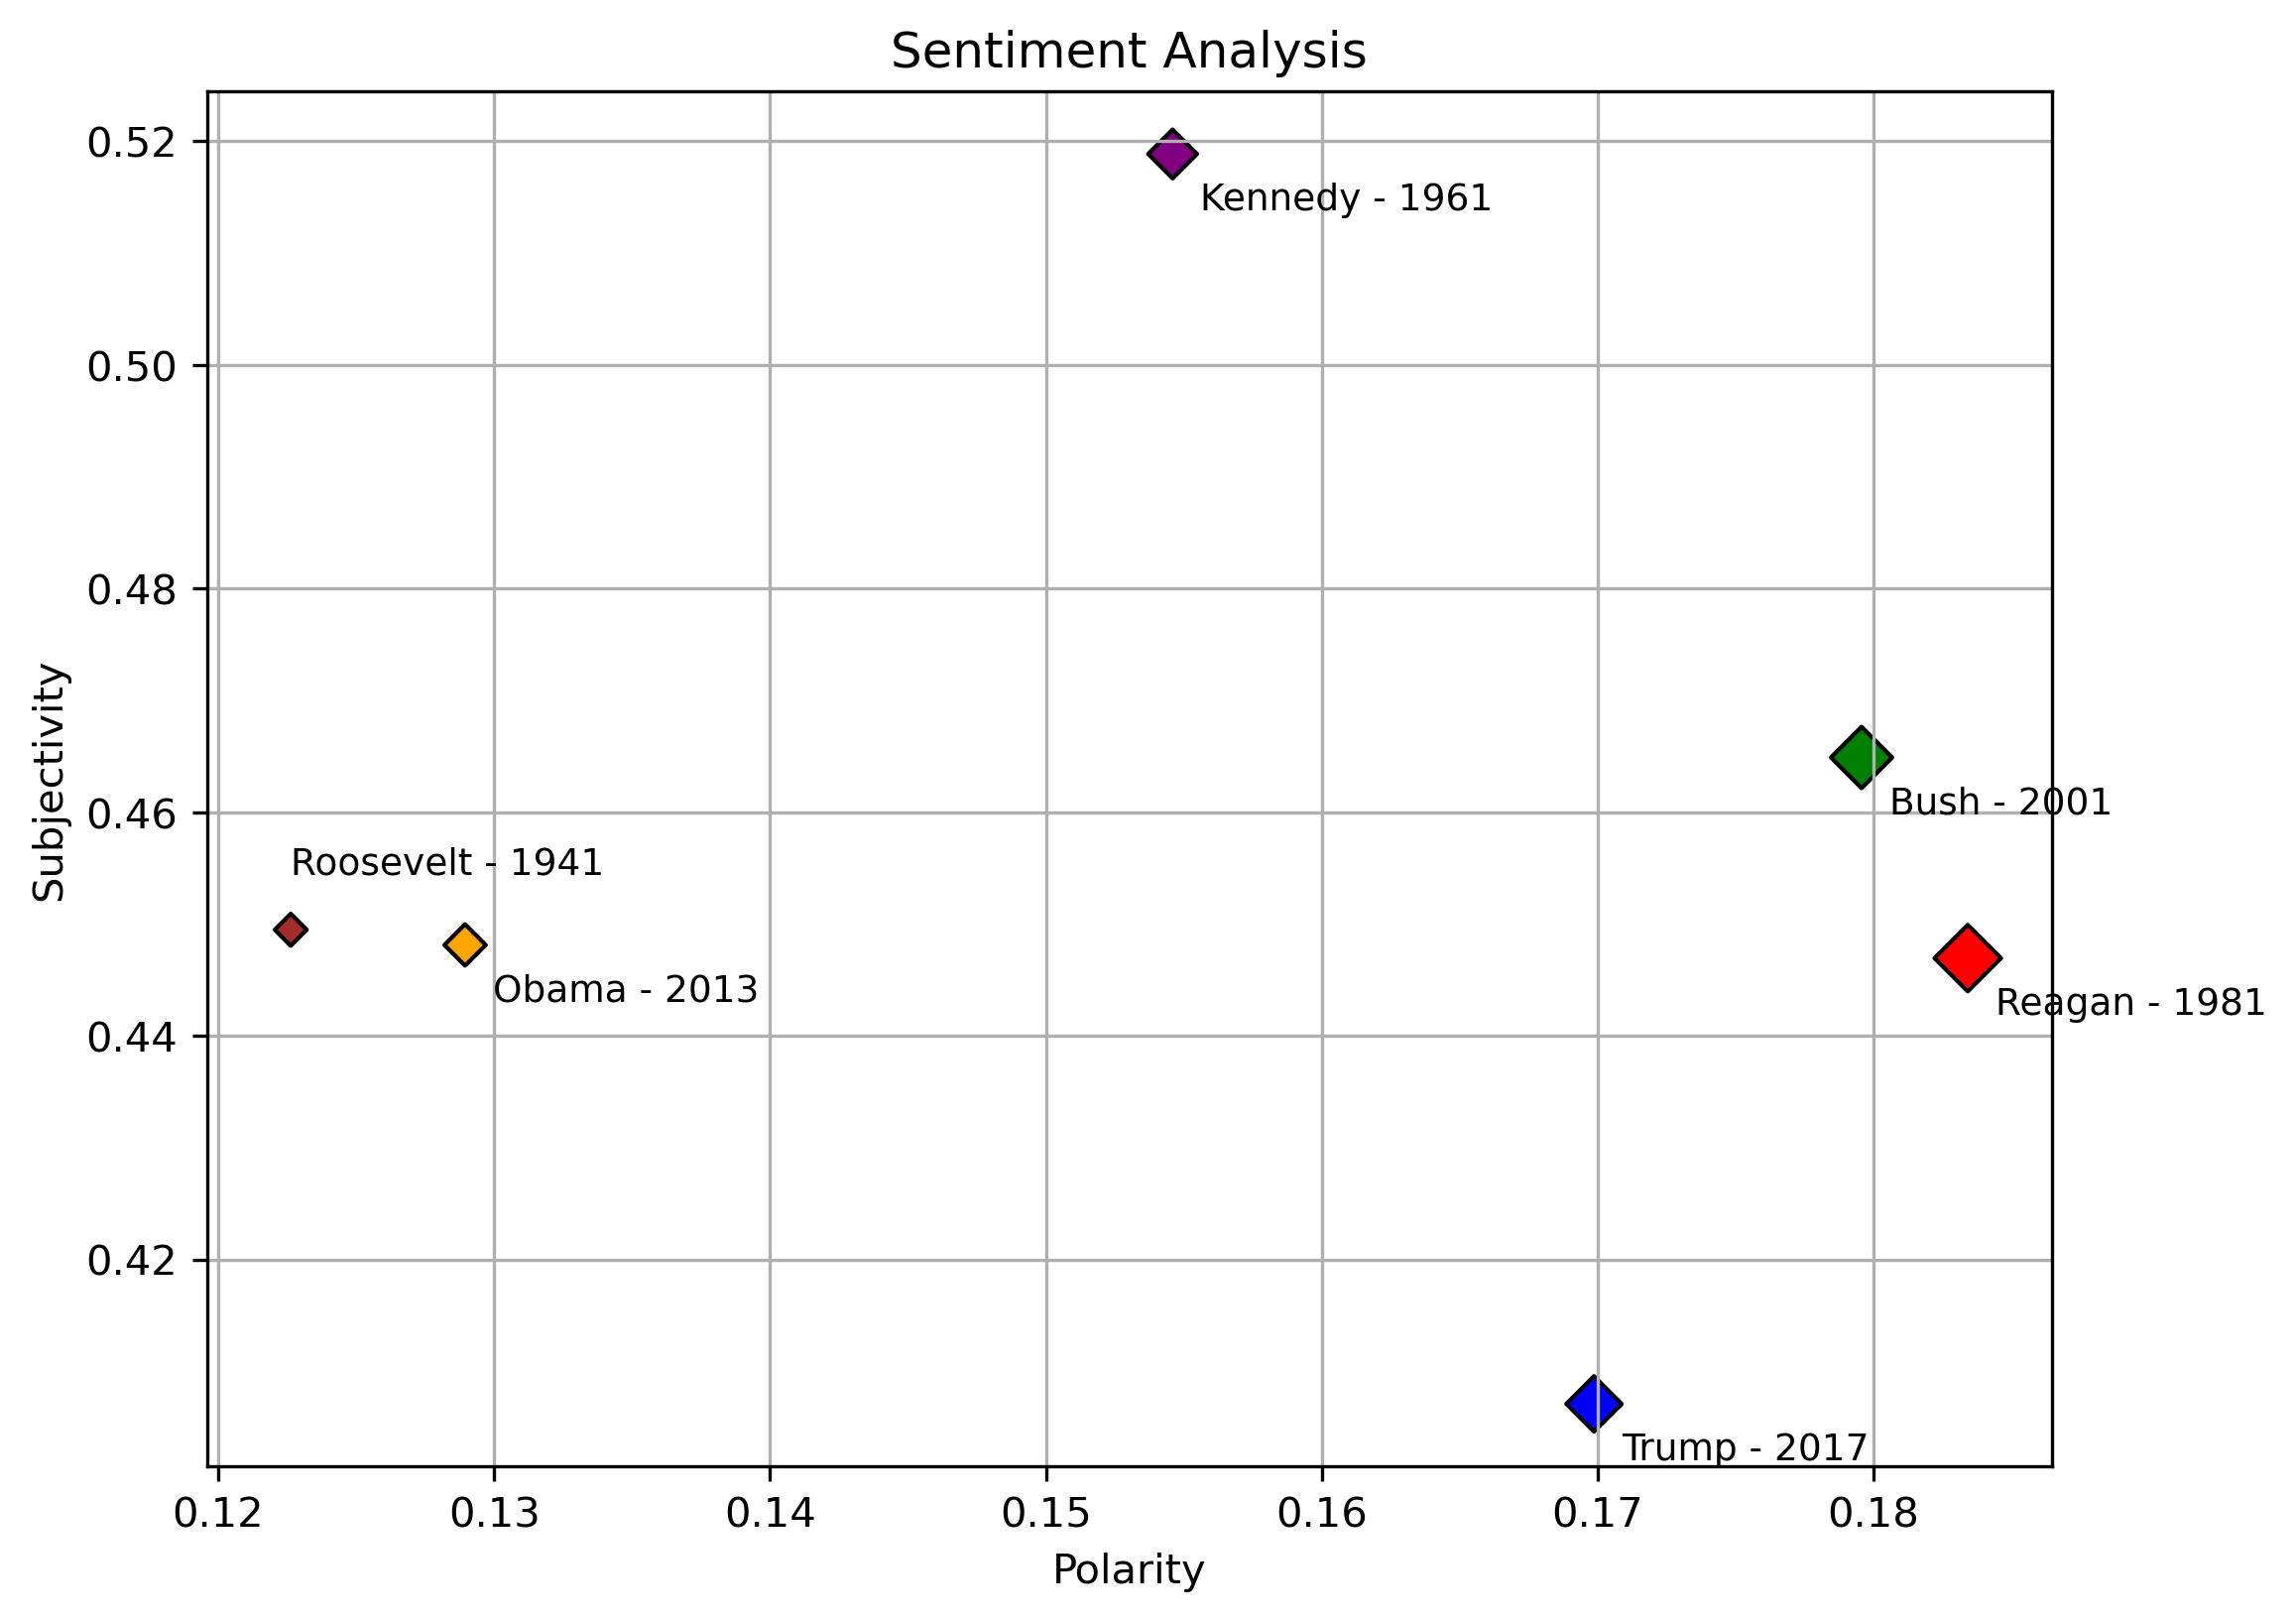

In [9]:
# Polarity score vs. Subjectivity score plot with links to each speech
area = [90, 50, 110, 130, 70, 30]
colors = ["blue", "orange", "green", "red", "purple", "brown"]
X, Y = [], []

# Fill lists
for i in range(len(presidents)):
    blob = TextBlob(presidents[i])
    X.append(blob.sentiment.polarity)
    Y.append(blob.sentiment.subjectivity)
    
# Create scatter plot
fig = plt.figure(figsize=(8,6), dpi=300)
s = plt.scatter(X, Y, marker="D", edgecolors="black", s=area, c=colors)

# Set links
s.set_urls(URLS)
plt.grid()
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

# Label points
for i in range(len(X) - 1):
    plt.text(X[i] + 0.001, Y[i] - 0.005, P_NAMES[i], fontsize=9)
plt.text(X[5], Y[5] + 0.005, P_NAMES[5], fontsize=9)
fig.savefig('scatter.svg')

In [10]:
# The above plot reveals that out of all the speeches, Kennedy gave the most subjective one of them, and 
# Trump gave the least subjective among them. The aforementioned speeches are also outliers when 
# it comes to their subjectivity score since the remaining speeches have scores that fall in the 0.44-0.47 
# range. We can also see that Reagan's speech overall had the most positive 
# tone as opposed to Roosevelt's with a minimum polarity score of about 0.122

In [11]:
# Vector functions (from class)
def vectorize(words, unique):
    '''
    vectorize list of words based on unique set constraint
    words - list of words
    unique - set of unique words
    return - vectorized list
    '''
    vector = [1 if word in words else 0 for word in unique]
    return vector

def mag(v):
    """ Magnitude of a vector v
        v - vector in list component notation, e.g., [1, 5, -1]
        return - float
    """
    return sum([i ** 2 for i in v]) ** 0.5
def dot(u, v):
    """ dot product of two vectors
        u - vector 1
        v - vector 2
        return - float
    """
    return sum([i * j for i,j in zip(u,v)])

def cosine_similarity(u, v):
    """ Cosine similarity between two vectors
        u - vector 1
        v - vector 2
        return - float
    """
    cos_theta = dot(u,v) / (mag(u) * mag(v))
    return cos_theta

In [12]:
# unique set of words of all speeches
presidents = [president.split() for president in presidents]
unique = set([word for president in presidents for word in president])

In [13]:
# An nxn array of cosine similarities
# arr[i, j] measures the similarity between speech i and speech j by first vectorizing each speech,
# then computing cosine similarities between all speeches, and finally storing each similarity in array
n = len(presidents)
arr = np.ones((n, n))
for i in range(n):
    vi = vectorize(presidents[i], unique)
    for j in range(i+1, n):
        vj = vectorize(presidents[j], unique) 
        arr[i, j] = cosine_similarity(vi, vj) 
        arr[j, i] = arr[i, j]                 

Text(0.5, 1.0, 'Similarity of Presidential Inaugural Speeches')

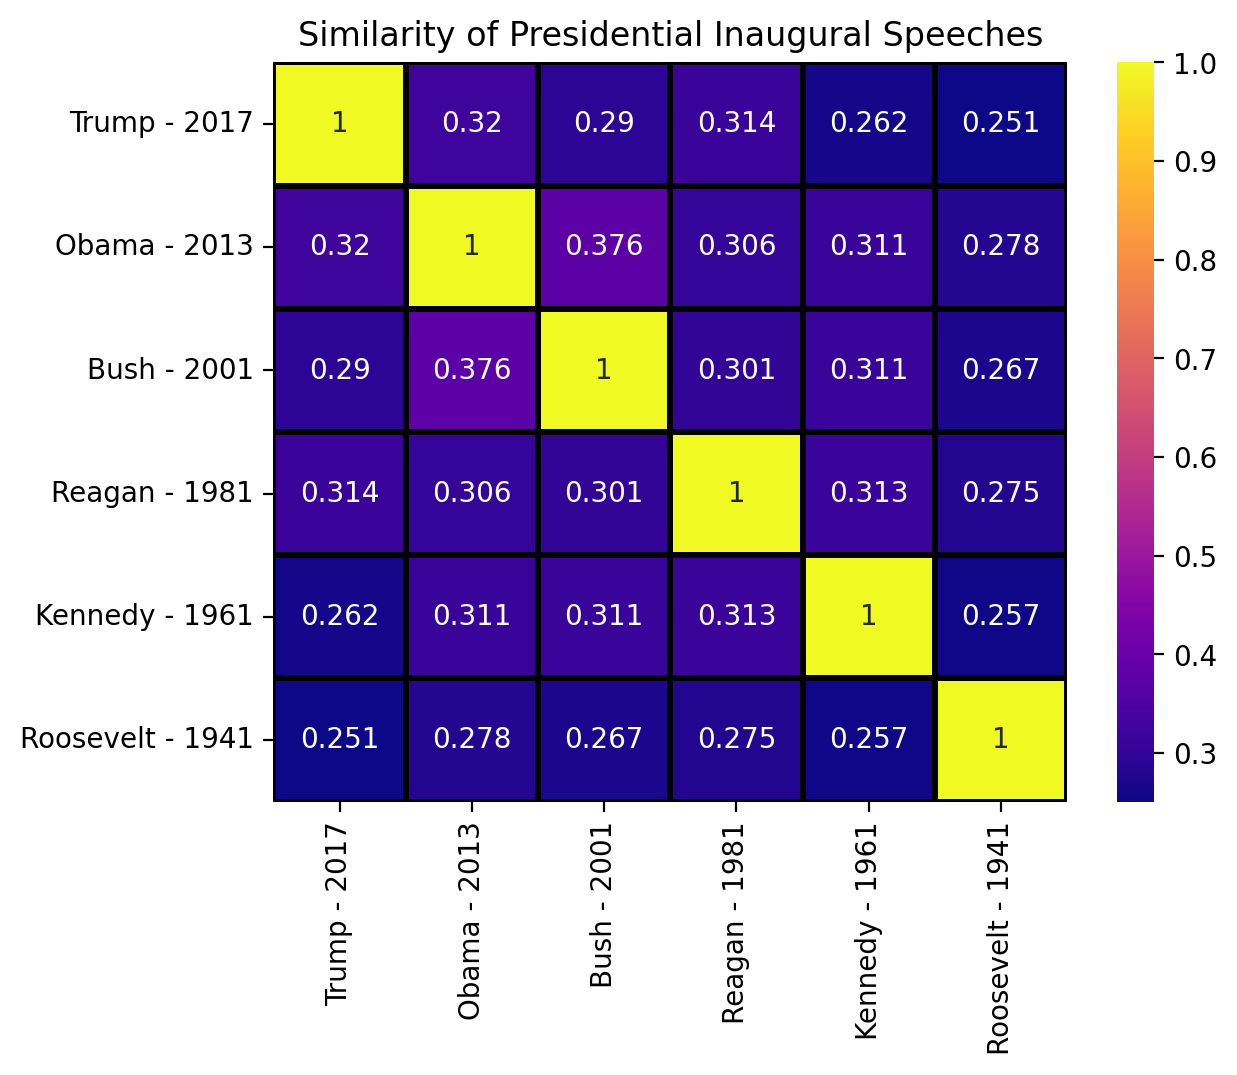

In [14]:
# plot heatmap of cosine similarities' array
fig = plt.figure(dpi=200)
sns.heatmap(arr, annot=True, fmt='.3g', xticklabels=P_NAMES, cmap="plasma", yticklabels=P_NAMES,
           linewidth=2, linecolor="black")
plt.title("Similarity of Presidential Inaugural Speeches")

In [15]:
# Heatmap reveals that Roosevelt's speech is the most different compared to all other speeches given that 
# it's the oldest speech of the list. In particular, Trump's and Roosevelt's speeches have a similarity
# of 0.251 which is the lowest similarity of the plot. This makes sense as Roosevelt's speech was given more
# than 80 years ago, and the problems the US was facing then were likely much different than the ones
# Trump was trying to ammend. 
# We can also see that the highest similarity is of 0.376 between Obama's and Bush's speeches. I found it 
# interesting given that 12 years went by after Bush gave his speech, and because of the fact that both
# presidents made part of different parties.